In [2]:
import tensorflow.keras as tk
import tensorflow as tf

In [3]:
train_dir = "C:/Learning/horse-or-human/horse-or-human/train"
validation_dir = "C:/Learning/horse-or-human/horse-or-human/validation"

In [4]:
# Normalize the image before inputting to NN
train_gen = tk.preprocessing.image.ImageDataGenerator(rescale=1.0/255)
# Image Data Generator make the input image size as per target_size. Its all done automatically
# It will pick batch_size number of images from disk and process them
# As this is binary image e.g. Horse vs Human we provide class_mode as binary, It will automatically label the images based on directory names
train_gen = train_gen.flow_from_directory(train_dir, target_size = (150,150), batch_size=128, class_mode='binary')

validation_gen = tk.preprocessing.image.ImageDataGenerator(rescale=1.0/255)
# Image Data Generator make the input image size as per target_size. Its all done automatically
# It will pick batch_size number of images from disk and process them
# As this is binary image e.g. Horse vs Human we provide class_mode as binary, It will automatically label the images based on directory names

validation_gen = validation_gen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=32, class_mode='binary')


# There is another way that is now recommended as ImageDataGenerator is depricating soon.
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""
DataSet
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""

#train_dataset = tk.utils.image_dataset_from_directory(train_dir,
#                                                            shuffle=True,
#                                                            batch_size=128,
#                                                            image_size=(300,300))
#validation_dataset = tk.utils.image_dataset_from_directory(validation_dir,
#                                                            shuffle=True,
#                                                            batch_size=128,
#                                                            image_size=(300,300))
#class_names = train_dataset.class_names

#print('Number of training batches: %d' % tf.data.experimental.cardinality(train_dataset).numpy())
#print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset).numpy())
# Autotune will decide batch size etc itself based on system resource availability
#AUTOTUNE = tf.data.AUTOTUNE
#train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
#validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


'\nDataSet\n'

In [5]:
# Create Sequential CNN
model = tk.Sequential()

In [6]:
# Architecture
# Conv2D -> Max Pool -> Conv2D -> Max Pool -> Conv 2D -> Max Pool -> Flatten -> FC -> FC
model.add(tk.layers.Conv2D(30, kernel_size=(3,3), activation='relu', input_shape = (150,150,3)))
model.add(tk.layers.MaxPool2D((2,2)))
model.add(tk.layers.Conv2D(15, kernel_size=(3,3), activation='relu'))
model.add(tk.layers.MaxPool2D((2,2)))
model.add(tk.layers.Conv2D(10, kernel_size=(3,3), activation='relu'))
model.add(tk.layers.MaxPool2D(2,2))
model.add(tk.layers.Flatten())
model.add(tk.layers.Dense(120, activation='relu'))
model.add(tk.layers.Dense(1, activation='sigmoid'))

In [7]:
# Lets print summary of the NN
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 30)      840       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 15)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 10)        1360      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 10)       0

In [8]:
# As this is binary classification hence using binary_crossentropy loss function and Adam optimizer.
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])


In [9]:
# Steps per epoch are taking 8 because we have ~1026 images in training dir and batch size in train_generator is 128 so we need to iterate
# 8 times to read 1026 files. 
model.fit(train_gen, 
          steps_per_epoch=8,
          epochs=2, 
          validation_data=validation_gen,
          validation_steps=8,
          verbose=2)

Epoch 1/2
8/8 - 17s - loss: 0.6690 - accuracy: 0.5595 - val_loss: 0.6071 - val_accuracy: 0.8125 - 17s/epoch - 2s/step
Epoch 2/2
8/8 - 16s - loss: 0.5176 - accuracy: 0.8131 - val_loss: 0.4348 - val_accuracy: 0.8633 - 16s/epoch - 2s/step


Shape of image (1, 150, 150, 3)
1/1 [==============================] - 0s 99ms/step
feature map shape 8


C:\Users\samehrot\AppData\Local\Temp\ipykernel_83148\3653883689.py:66: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


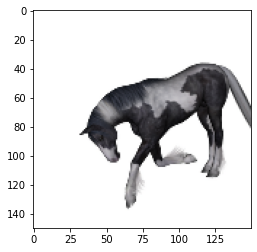

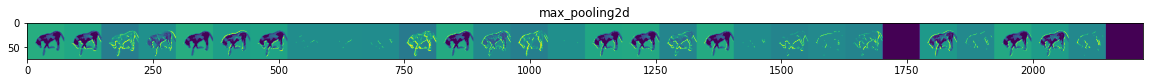

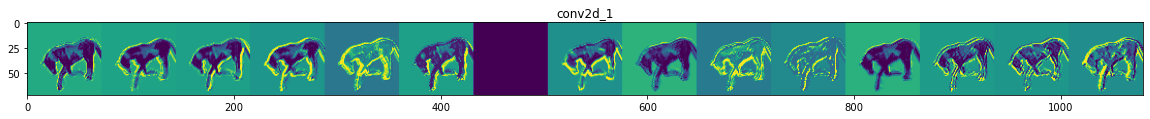

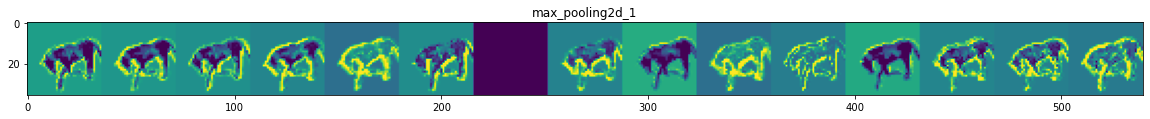

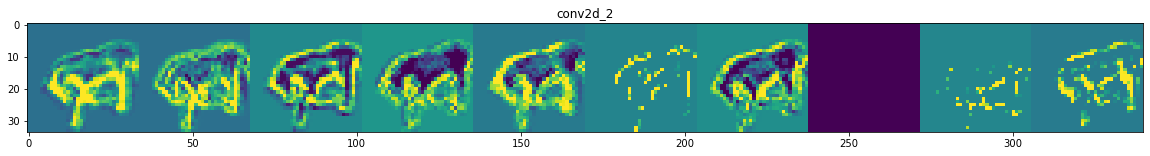

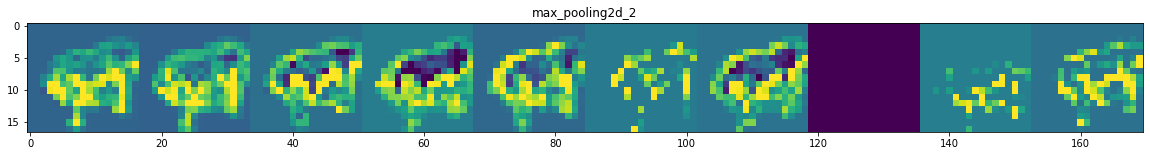

In [15]:
# The below code help visulizing how image is transforming each layer.

import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img
import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Setting Validation horse and human directory path to pick images
validation_horse_names = os.listdir(validation_dir+"/horses")
validation_human_names = os.listdir(validation_dir+"/humans")


# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
# Create a list of all file names from horse and human directory
horse_img_files = [os.path.join(validation_dir+"/horses", f) for f in validation_horse_names]
human_img_files = [os.path.join(validation_dir+"/humans", f) for f in validation_human_names]
# Pick random one from the lists 
img_path = random.choice(horse_img_files + human_img_files)

# The below step loads an image and convert it to array 
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
plt.imshow(img)
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)
print(f"Shape of image {x.shape}")
# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)
print("feature map shape", len(successive_feature_maps))
# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:

        # Just do this for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in feature map

        # The feature map has shape (1, size, size, n_features)
        size = feature_map.shape[1]

        # Tile the images in this matrix
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
          x = feature_map[0, :, :, i]
          x -= x.mean()
          x /= x.std()
          x *= 64
          x += 128
          x = np.clip(x, 0, 255).astype('uint8')

          # Tile each filter into this big horizontal grid
          display_grid[:, i * size : (i + 1) * size] = x

        # Display the grid
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
